### Data source [NCES](http://nces.ed.gov/ipeds/deltacostproject/)

The data is publicly available from National Center of Education Statistics (NCES). The Integrated Postsecondary Education Data System (IPEDS) data includes academic years from 1987 through 2012. The data derived from the institutional characteristics, finance, enrollment, completions, graduation rates, student financial aid, and human resources IPEDS survey components and a limited number of outside sources. The database contains one observation per institution for each year of data that is available; it includes all institutions that reported institutional characteristic data to IPEDS in the fall of each academic year. 

To allow for trends analyses that are not affected by institutions entering or leaving the dataset, the database includes variables to identify panels of institutions that report data consistently over specified time periods. These institutional panels are referred to as “matched sets.” To be included in the matched set, an institution must have data on three measures—fall full-time equivalent (FTE) student enrollment, instructional expenditures, and student completions—for every year in the panel time period. There are three different matched sets that cover different time periods: 1987-2012, 2002-2012, and 2007-2012. 

By analysing the data, I try to answer the following questions:

Minor questions:
1. The trend of completition rate over the time period from 1987 through 2012
2. The trend of total financial aid per student over the time period from 1987 through 2012
3. The fraction of fragship institutions and what is the difference of completition rate between 
flagship institutions and non-flagship institutions
4. Which state's institutes have the best balanced finance

Major questions:
1. What types of financial aid are most effective in maximizing completion rates?
2. What types of financial aid are most effective in minimizing student loan burdens?
3. What types of financial aid are most effective in maintaining well-funded schools?
4. Establish a model to predict which institution will have better balanced financial


In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from IPython.display import display

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Data

In [2]:
dt_8799 = pd.read_csv('C:\Users\dbsnail\machine-learning\projects\capstone\delta_public_87_99.csv' , low_memory=False)
dt_8799.shape

(128053, 974)

In [3]:
dt_0012 = pd.read_csv('C:\Users\dbsnail\machine-learning\projects\capstone\delta_public_00_12.csv', low_memory=False)
dt_0012.shape

(87560, 974)

In [4]:
dt_0012.head(2)

,groupid,academicyear,unitid_linchpin,unitid,isgrouped,instname,TCSName,city,state,zip,...,Iptall1,Iptall2,Iptall3,Iptall4,Iptall5,Iptall6,Iptall7,Iptall8,Ifaculty_instr_headcount,Isalarytotal
0,-475291,2012,475291,475291,0,Brown College-Brooklyn Center,NaN,Brooklyn Center,MN,55430,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
1,-475282,2012,475282,475282,0,Marian Health Careers Center-Van Nuys Campus,NaN,Van Nuys,CA,91411,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2


In [5]:
dt_0012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87560 entries, 0 to 87559
Columns: 974 entries, groupid to Isalarytotal
dtypes: float64(550), int64(419), object(5)
memory usage: 650.7+ MB


## Clean Data

### Filter Columns contains "imputation flag" information

In [10]:
import remove_cols
rm_cols = remove_cols.remove_cols()
print len(rm_cols)

IndentationError: unindent does not match any outer indentation level (remove_cols.py, line 5)

In [14]:
remain_cols = []
for col in dt_0012.columns:
    if col not in remove_cols:
        remain_cols.append(col)
print len(remain_cols)        

585


### Find columns have all null values

In [20]:
# dt_0012 dataset
dt_0012_null_cols = []
for col in remain_cols:
    if dt_0012[col].isnull().values.all() == True:
        dt_0012_null_cols.append(col)
        
print len(dt_0012_null_cols)

4


In [21]:
dt_8799_null_cols = []
for col in remain_cols:
    if dt_8799[col].isnull().values.all() == True:
        dt_8799_null_cols.append(col)
        
print len(dt_8799_null_cols)

102


In [25]:
combined_null_cols = dt_0012_null_cols + dt_8799_null_cols
print len(combined_null_cols)

106


### Remove all unwanted columns

In [27]:
new_cols = [ col for col in remain_cols if col not in combined_null_cols]
print len(new_cols)

479


In [28]:
# combine data
data = pd.concat([dt_0012[new_cols], dt_8799[new_cols]], axis=0)
data.shape

(215613, 479)

### To have the consistant longitudinal report for a specific institution, we will use only matched set from time period 1987-2012

In [29]:
dt = data[data['matched_n_87_12_26']==1]
dt.shape

(63804, 479)

In [30]:
dt.head(2)

,groupid,academicyear,unitid_linchpin,unitid,isgrouped,instname,TCSName,city,state,zip,...,ft_service_maintenance_share,total_faculty_all,full_time_employees,full_time_employee_share,all_employees,ft_faculty_salary,full_time_employee_100fte,full_time_faculty_share,faculty_instr_headcount,salarytotal
25055,-243823,2000,243823,243823,0,Parker College of Chiropractic,NaN,Dallas,TX,75229-566,...,0.576923,95.0,243.0,0.886861,274.0,NaN,26.867022,0.957895,NaN,NaN
25056,-243823,2001,243823,243823,0,Parker College of Chiropractic,NaN,Dallas,TX,75229-566,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Explore Data

In [60]:
dt['ft_first_time_first_yr_deg_seek']

25055        NaN
25056        NaN
25057        NaN
25058        NaN
25059        NaN
25060        NaN
25061        NaN
25062        NaN
25063        NaN
25064        NaN
25065        NaN
25066        NaN
25067        NaN
25103     1749.0
25104     1598.0
25105     1615.0
25106     1636.0
25107     1640.0
25108     1645.0
25109     1632.0
25110     1646.0
25111     1721.0
25112     1703.0
25113     1692.0
25114     1672.0
25115     1704.0
25787     1204.0
25788     1336.0
25789     1422.0
25790     1451.0
           ...  
127996     712.0
127997     818.0
127998     851.0
127999     672.0
128000     547.0
128001     578.0
128002     530.0
128003     473.0
128004     375.0
128005     367.0
128006     374.0
128007     450.0
128008     392.0
128009     582.0
128010     591.0
128011     463.0
128012     517.0
128026     825.0
128027    1024.0
128028     779.0
128029     546.0
128030     573.0
128031     475.0
128032     411.0
128033     332.0
128034     371.0
128035     383.0
128036     498

(array([  5.29840000e+04,   4.15400000e+03,   1.11900000e+03,
          3.52000000e+02,   1.14000000e+02,   4.30000000e+01,
          1.60000000e+01,   1.30000000e+01,   1.00000000e+01,
          7.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          9.00000000e+00,   1.10000000e+01,   6.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   2.00000000e+00]),
 array([     0.  ,   1713.35,   3426.7 ,   5140.05,   6853.4 ,   8566.75,
         10280.1 ,  11993.45,  13706.8 ,  15420.15,  17133.5 ,  18846.85,
         20560.2 ,  22273.55,  23986.9 ,  25700.25,  27413.6 ,  29126.95,
         30840.3 ,  32553.65,  34267.  ]),
 <a list of 20 Patch objects>)

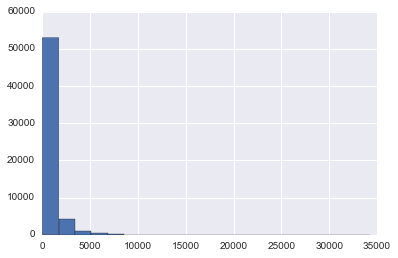

In [66]:
# calculate completetion rate, and student count for each year
plt.hist(dt['ft_first_time_first_yr_deg_seek'].dropna(), bins=20)

In [ ]:
sns.kdeplot(dt['ft_first_time_first_yr_deg_seek'].dropna(), shade=True)

In [ ]:
sns.boxplot(dt.totalcompletions_100fte, dt.academicyear)

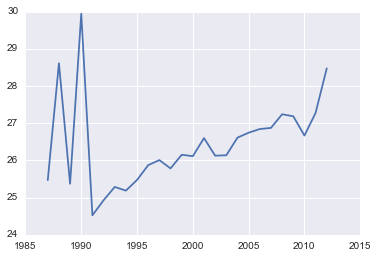

In [32]:
# plot the completion trend over the years
plt.plot(dt["totalcompletions_100fte"].groupby(dt['academicyear']).mean()) 

In [78]:
# calculate the average financial aid grants
dt_grant = dt[["grant01","grant02","grant03", "grant05","grant06","grant07"]].groupby(dt['academicyear']).mean()
dt_grant.columns=["PellGrants", "OtherFedGrants","StateGrants","InstitutionalFundedGrants","InstitutionalUnfundedGrants",
                                    "TotalFinancialAid"]
print display(dt_grant.head())

,PellGrants,OtherFedGrants,StateGrants,InstitutionalFundedGrants,InstitutionalUnfundedGrants,TotalFinancialAid
academicyear,,,,,,
1987,1.002773e+06,326515.864965,596758.879711,399579.856228,1.403953e+06,2.806867e+06
1988,1.040174e+06,326761.995982,641464.490444,410703.174282,1.482173e+06,3.056193e+06
1989,1.282893e+06,321535.564246,713084.726990,431575.522045,1.680622e+06,3.524076e+06
1990,1.398670e+06,339585.051187,745543.355918,463225.105081,1.923514e+06,3.918923e+06
1991,1.457087e+06,361942.124971,787670.915440,510456.453023,2.221085e+06,4.333925e+06


None


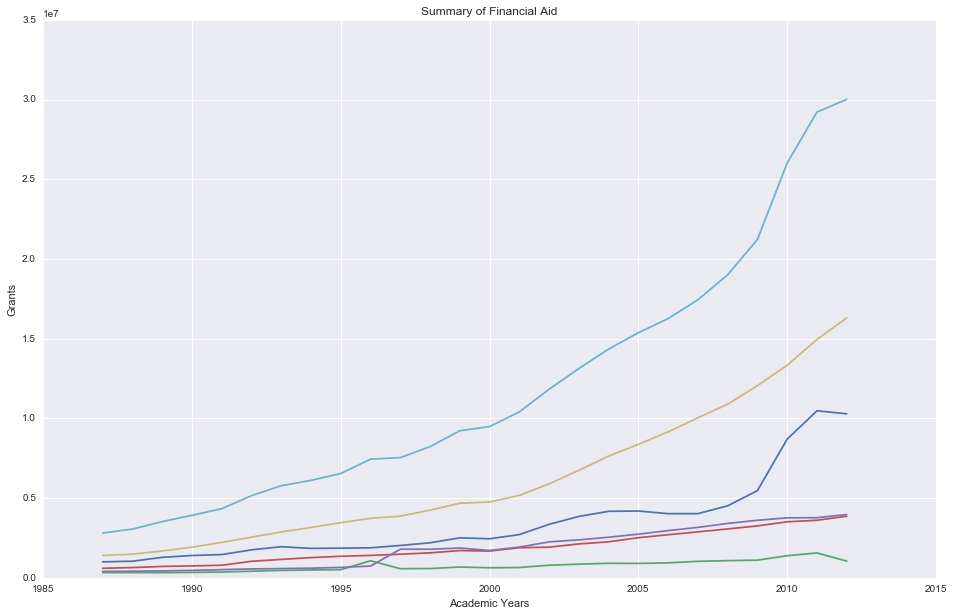

In [77]:
# plot the financial aid trend

plt.figure(figsize=(16,10))
plt.plot(dt_grant)
plt.xlabel('Academic Years')
plt.ylabel('Grants')
plt.title('Summary of Financial Aid')
plt.show()

In [10]:
discard_cols=['Ifte_count',
'ifte12mn',
'Ituition01',
'Ituition02',
'Ituition03',
'Inettuition01',
'Ifederal03',
'Istate03',
'Ilocal03',
'Ifederal07',
'Istate06',
'Ilocal06',
'Ifederal10',
'Istate09',
'Iprivate03',
'Iinvestment01',
'Iaffiliate01',
'Iendowment03',
'Iedactivity03',
'Iauxiliary03',
'Ihospital03',
'Iother03',
'Iother04',
'Iindependent03',
'Iother05',
'Itotal03_revenue',
'Iappliedaid01',
'Iappliedaid02',
'Igrant01',
'Igrant02',
'Igrant03',
'Igrant04',
'Igrant05',
'Igrant06',
'Igrant07',
'Iany_aid_num',
'Iany_aid_pct',
'Ifed_grant_num',
'Ifed_grant_pct',
'Ifed_grant_avg_amount',
'Istate_grant_num',
'Istate_grant_pct',
'Istate_grant_avg_amount',
'Iinst_grant_num',
'Iinst_grant_pct',
'Iinst_grant_avg_amount',
'Iloan_num',
'Iloan_pct',
'Iloan_avg_amount',
'Ituition01_tf',
'Ifee01_tf',
'Ituitionfee01_tf',
'Ituition02_tf',
'Ifee02_tf',
'Ituitionfee02_tf',
'Ituition03_tf',
'Ifee03_tf',
'Ituitionfee03_tf',
'Ituition05_tf',
'Ifee05_tf',
'Ituitionfee05_tf',
'Ituition06_tf',
'Ifee06_tf',
'Ituitionfee06_tf',
'Ituition07_tf',
'Ifee07_tf',
'Ituitionfee07_tf',
'Iinstruction01',
'Iinstruction01_fasb',
'Iinstruction02',
'Iresearch01',
'Iresearch01_fasb',
'Iresearch02',
'Ipubserv01',
'Ipubserv01_fasb',
'Ipubserv02',
'Iacadsupp01',
'Iacadsupp01_fasb',
'Iacadsupp02',
'Istudserv01',
'Istudserv01_fasb',
'Istudserv02',
'Iinstsupp01',
'Iinstsupp01_fasb',
'Iinstsupp02',
'Iopermain01',
'Iopermain01_fasb',
'Iopermain02',
'Idepreciation01',
'Igrants01u',
'Igrants01r',
'Igrants01',
'Igrants01_fasb',
'Iauxiliary01',
'Iauxiliary01_fasb',
'Iauxiliary02',
'Ihospital01',
'Ihospital01_fasb',
'Ihospital02',
'Iindepend01',
'Iindepend01_fasb',
'Iindepend02',
'Iotheroper01',
'Iotheroper02',
'Itotaloper01',
'Itotaloper02',
'Itotaloper03',
'Itotaloper04',
'Itotaloper05',
'Iinterest01',
'Iothernon01',
'Iothernon02',
'Iother01',
'Iother01_fasb',
'Iother02',
'Itotalnon01',
'Itotalnon02',
'Itotal01',
'Itotal02',
'Itotal03_expenses',
'Itotal04',
'Itotal05',
'Itotal07',
'Ieandg01',
'Ieandg02',
'Ieandg03',
'Ieandg03a',
'Ieandg03b',
'Ieandg04',
'Ieandg05',
'Ieandg07',
'Ieandg08',
'Iassets06',
'Iliabilities07',
'Iassets11',
'Iland04',
'Ibuildings05',
'Iequipment05',
'Iassets15',
'Iendow02m',
'Iassets16',
'Iassociatedegrees',
'Ibachelordegrees',
'Imasterdegrees',
'Idoctordegrees',
'Ifirstprofdegrees',
'Iawardslessthan1yr',
'Iawards1yrto2yr',
'Iawards2yrto4yr',
'Ipostbacccertificates',
'Ipostmastcertificates',
'Ifirstprofcertificates',
'Ipostmastfpcert',
'Itotaldegrees',
'Itotalawards',
'Itotalcertificates',
'Itotalcompletions',
'Igrad_rate_150_n',
'Igrad_rate_150_p',
'Igrad_rate_adj_cohort_n',
'Igrad_rate_150_n4yr',
'Igrad_rate_150_p4yr',
'Igrad_rate_adj_cohort_n4yr',
'Igrad_rate_150_n2yr',
'Igrad_rate_150_p2yr',
'Igrad_rate_adj_cohort_n2yr',
'Iugentering',
'Igrscohort',
'Ipt_ugentering',
'Igrscohortpct',
'Iftretention_rate',
'Iptretention_rate',
'Ifall_cohort_num',
'Ifall_cohort_pct',
'Ifall_cohort_num_indistrict',
'Ifall_cohort_pct_indistrict',
'Ifall_cohort_num_instate',
'Ifall_cohort_pct_instate',
'Ifall_cohort_num_outofstate',
'Ifall_cohort_pct_outofstate',
'Ifall_cohort_num_resunknown',
'Ifall_cohort_pct_resunknown',
'Ifall_total_undergrad',
'Iyear_cohort_num',
'Iyear_cohort_pct',
'Iyear_total_undergrad',
'Ift_first_time_first_yr_deg_seek',
'Iother_full_time',
'Itotal_full_time_undergraduates',
'Itotal_full_time_first_prof',
'Itotal_full_time_graduates',
'Itotal_full_time_postbacc',
'Itotal_full_time',
'Ipt_first_time_first_yr_deg_seek',
'Iother_part_time',
'Itotal_part_time_undergraduates',
'Itotal_part_time_first_prof',
'Itotal_part_time_graduates',
'Itotal_part_time_postbacc',
'Itotal_part_time',
'itotal_undergraduates',
'itotal_graduates',
'itotal_first_prof',
'itotal_postbacc',
'Itotal_enrollment',
'Itotal_enrollment_amin_tot',
'Itotal_enrollment_asian_tot',
'Itotal_enrollment_black_tot',
'Itotal_enrollment_hisp_tot',
'Itotal_enrollment_white_tot',
'Itotal_enrollment_unkn_tot',
'Itotal_enrollment_nonres_tot',
'Iftall03ug',
'Iftall04ug',
'Iftall05ug',
'Iftall06ug',
'Iftall08ug',
'Iftall09ug',
'Iftall10ug',
'Iftall11ug',
'Iftall12ug',
'Iftall13ug',
'Iftall14ug',
'Iftall03pr',
'Iftall04pr',
'Iftall05pr',
'Iftall06pr',
'Iftall08pr',
'Iftall09pr',
'Iftall10pr',
'Iftall11pr',
'Iftall12pr',
'Iftall13pr',
'Iftall14pr',
'Iftall03gr',
'Iftall04gr',
'Iftall05gr',
'Iftall06gr',
'Iftall08gr',
'Iftall09gr',
'Iftall10gr',
'Iftall11gr',
'Iftall12gr',
'Iftall13gr',
'Iftall14gr',
'Iftall03',
'Iftall04',
'Iftall05',
'Iftall06',
'Iftall08',
'Iftall09',
'Iftall10',
'Iftall11',
'Iftall12',
'Iftall13',
'Iftall14',
'Iptall03ug',
'Iptall04ug',
'Iptall05ug',
'Iptall06ug',
'Iptall08ug',
'Iptall09ug',
'Iptall10ug',
'Iptall11ug',
'Iptall12ug',
'Iptall13ug',
'Iptall14ug',
'Iptall03pr',
'Iptall04pr',
'Iptall05pr',
'Iptall06pr',
'Iptall08pr',
'Iptall09pr',
'Iptall10pr',
'Iptall11pr',
'Iptall12pr',
'Iptall13pr',
'Iptall14pr',
'Iptall03gr',
'Iptall04gr',
'Iptall05gr',
'Iptall06gr',
'Iptall08gr',
'Iptall09gr',
'Iptall10gr',
'Iptall11gr',
'Iptall12gr',
'Iptall13gr',
'Iptall14gr',
'Iptall03',
'Iptall04',
'Iptall05',
'Iptall06',
'Iptall08',
'Iptall09',
'Iptall10',
'Iptall11',
'Iptall12',
'Iptall13',
'Iptall14',
'Iftallgrp1ug',
'Iftallgrp2ug',
'Iftallgrp3ug',
'Iftallgrp4ug',
'Iptallgrp1ug',
'Iptallgrp2ug',
'Iptallgrp3ug',
'Iptallgrp4ug',
'Iftallgrp1pr',
'Iftallgrp2pr',
'Iftallgrp3pr',
'Iftallgrp4pr',
'Iptallgrp1pr',
'Iptallgrp2pr',
'Iptallgrp3pr',
'Iptallgrp4pr',
'Iftallgrp1gr',
'Iftallgrp2gr',
'Iftallgrp3gr',
'Iftallgrp4gr',
'Iptallgrp1gr',
'Iptallgrp2gr',
'Iptallgrp3gr',
'Iptallgrp4gr',
'Iftallgrp1',
'Iftallgrp2',
'Iftallgrp3',
'Iftallgrp4',
'Iptallgrp1',
'Iptallgrp2',
'Iptallgrp3',
'Iptallgrp4',
'Idependent1',
'Idependent2',
'Idependent3',
'Idependent4',
'Idependent5',
'Iindependent1',
'Iindependent2',
'Iindependent3',
'Iindependent4',
'Iindependent5',
'Iapplcn',
'Iapplcnm',
'Iapplcnw',
'Iadmssn',
'Iadmssnm',
'Iadmssnw',
'Ienrlt',
'Ienrlm',
'Ienrlw',
'Iapplicantcount',
'Iadmitcount',
'Ienrollftcount',
'Ienrollptcount',
'Iactnum',
'Iactpct',
'Iactcm25',
'Iactcm75',
'Iacten25',
'Iacten75',
'Iactmt25',
'Iactmt75',
'Isatnum',
'Isatpct',
'Isatmt25',
'Isatmt75',
'Isatvr25',
'Isatvr75',
'Icredhoursug',
'Iconthoursug',
'Icredhoursgr',
'Iftall1',
'Iftall3',
'Iftall4',
'Iftall5',
'Iftall6',
'Iftall7',
'Iftall8',
'Iptall1',
'Iptall2',
'Iptall3',
'Iptall4',
'Iptall5',
'Iptall6',
'Iptall7',
'Iptall8',
'Ifaculty_instr_headcount',
'Isalarytotal'
]

In [8]:
print cols

['Ifte_count', 'ifte12mn', 'Ituition01', 'Ituition02', 'Ituition03', 'Inettuition01', 'Ifederal03', 'Istate03', 'Ilocal03', 'Ifederal07', 'Istate06', 'Ilocal06', 'Ifederal10', 'Istate09', 'Iprivate03', 'Iinvestment01', 'Iaffiliate01', 'Iendowment03', 'Iedactivity03', 'Iauxiliary03', 'Ihospital03', 'Iother03', 'Iother04', 'Iindependent03', 'Iother05', 'Itotal03_revenue', 'Iappliedaid01', 'Iappliedaid02', 'Igrant01', 'Igrant02', 'Igrant03', 'Igrant04', 'Igrant05', 'Igrant06', 'Igrant07', 'Iany_aid_num', 'Iany_aid_pct', 'Ifed_grant_num', 'Ifed_grant_pct', 'Ifed_grant_avg_amount', 'Istate_grant_num', 'Istate_grant_pct', 'Istate_grant_avg_amount', 'Iinst_grant_num', 'Iinst_grant_pct', 'Iinst_grant_avg_amount', 'Iloan_num', 'Iloan_pct', 'Iloan_avg_amount', 'Ituition01_tf', 'Ifee01_tf', 'Ituitionfee01_tf', 'Ituition02_tf', 'Ifee02_tf', 'Ituitionfee02_tf', 'Ituition03_tf', 'Ifee03_tf', 'Ituitionfee03_tf', 'Ituition05_tf', 'Ifee05_tf', 'Ituitionfee05_tf', 'Ituition06_tf', 'Ifee06_tf', 'Ituition

In [11]:
removed_cols = discard_cols
print removed_cols

['Ifte_count', 'ifte12mn', 'Ituition01', 'Ituition02', 'Ituition03', 'Inettuition01', 'Ifederal03', 'Istate03', 'Ilocal03', 'Ifederal07', 'Istate06', 'Ilocal06', 'Ifederal10', 'Istate09', 'Iprivate03', 'Iinvestment01', 'Iaffiliate01', 'Iendowment03', 'Iedactivity03', 'Iauxiliary03', 'Ihospital03', 'Iother03', 'Iother04', 'Iindependent03', 'Iother05', 'Itotal03_revenue', 'Iappliedaid01', 'Iappliedaid02', 'Igrant01', 'Igrant02', 'Igrant03', 'Igrant04', 'Igrant05', 'Igrant06', 'Igrant07', 'Iany_aid_num', 'Iany_aid_pct', 'Ifed_grant_num', 'Ifed_grant_pct', 'Ifed_grant_avg_amount', 'Istate_grant_num', 'Istate_grant_pct', 'Istate_grant_avg_amount', 'Iinst_grant_num', 'Iinst_grant_pct', 'Iinst_grant_avg_amount', 'Iloan_num', 'Iloan_pct', 'Iloan_avg_amount', 'Ituition01_tf', 'Ifee01_tf', 'Ituitionfee01_tf', 'Ituition02_tf', 'Ifee02_tf', 'Ituitionfee02_tf', 'Ituition03_tf', 'Ifee03_tf', 'Ituitionfee03_tf', 'Ituition05_tf', 'Ifee05_tf', 'Ituitionfee05_tf', 'Ituition06_tf', 'Ifee06_tf', 'Ituition